# Explainable AI with SHAP: Multiclass Classification on the Iris Dataset


This notebook demonstrates the use of **SHAP (SHapley Additive exPlanations)** to explain a multiclass classification model built with logistic regression on the classic **Iris dataset**.


In [ ]:
from sklearn.datasets import load_iris
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix
import shap

iris = load_iris()
X = pd.DataFrame(iris.data, columns=iris.feature_names)
y = iris.target
target_names = iris.target_names
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=33)


/home/nnieto/Nico/Cursos/.courses/lib/python3.9/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
# Train the model
model = LogisticRegression(max_iter=200)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

print("\nAccuracy:", accuracy_score(y_test, y_pred))

Confusion Matrix:
 [[ 8  0  0]
 [ 0  8  0]
 [ 0  2 12]]

Accuracy: 0.9333333333333333


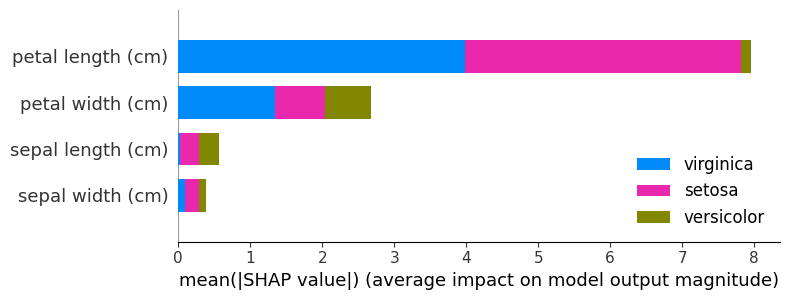

In [3]:
explainer = shap.Explainer(model, X_train)
shap_values = explainer(X_test)

shap.summary_plot(shap_values, X_test, class_names=target_names)


## Question!

### Is there any other plot to explore multi-class problems with shap? Go to the shap API and find out!